<a href="https://colab.research.google.com/github/magomezma-svg/Senales-y-sistemas/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 1 – Demodulación coherente AM DSB-CS

A continuación desarrollo, de forma teórica, el espectro de Fourier en cada etapa del demodulador coherente de AM DSB-CS, asumiendo:

$$ \theta_0 = 0 $$

La señal recibida es:

$$ s_{rec}(t) = A_1\, m(t)\cos(2\pi f_0 t + \theta_0) $$

Como $$ \theta_0 = 0 $$, queda:

$$ s_{rec}(t) = A_1 m(t)\cos(2\pi f_0 t) $$

Definimos $$ \omega_0 = 2\pi f_0 $$, entonces:

$$ s_{rec}(t) = A_1 m(t)\cos(\omega_0 t) $$

---

## 1. Espectro de la señal recibida

Usamos la identidad:

$$ \cos(\omega_0 t) = \frac{e^{j\omega_0 t} + e^{-j\omega_0 t}}{2} $$

Por linealidad de la transformada de Fourier, si $$ m(t) \leftrightarrow M(\omega) $$, entonces:

$$
\mathcal{F}\{ m(t)e^{j\omega_0 t} \} = M(\omega - \omega_0)
$$

$$
\mathcal{F}\{ m(t)e^{-j\omega_0 t} \} = M(\omega + \omega_0)
$$

Por tanto:

$$
S_{rec}(\omega)
= A_1 \cdot \frac{1}{2}\Big[ M(\omega - \omega_0) + M(\omega + \omega_0) \Big]
$$

Es decir:

$$
S_{rec}(\omega) = \frac{A_1}{2}\Big[ M(\omega - \omega_0) + M(\omega + \omega_0) \Big]
$$

**Interpretación:** el espectro del mensaje se replica en $$ \pm \omega_0 $$ (doble banda lateral).

---

## 2. Señal a la salida del mixer

El mixer multiplica la señal recibida por un coseno a la misma frecuencia:

$$
y(t) = s_{rec}(t)\cdot \cos(\omega_0 t)
$$

Reemplazando:

$$
y(t) = A_1 m(t)\cos(\omega_0 t)\cos(\omega_0 t)
$$

Usamos la identidad de producto de cosenos:

$$
\cos(\omega_0 t)\cos(\omega_0 t)
= \frac{1}{2} + \frac{1}{2}\cos(2\omega_0 t)
$$

Entonces:

$$
y(t) = A_1 m(t)\left[ \frac{1}{2} + \frac{1}{2}\cos(2\omega_0 t) \right]
$$

$$
y(t) = \frac{A_1}{2}m(t) + \frac{A_1}{2}m(t)\cos(2\omega_0 t)
$$

Se identifican dos componentes:

1. **Componente de baja frecuencia (útil):**

   $$ \frac{A_1}{2}m(t) $$

2. **Componente de alta frecuencia (no deseada):**

   $$ \frac{A_1}{2}m(t)\cos(2\omega_0 t) $$

---

### 2.1. Espectro de la salida del mixer

La transformada de:

$$
\frac{A_1}{2}m(t) \quad \rightarrow \quad \frac{A_1}{2} M(\omega)
$$

Para el segundo término, usando de nuevo el corrimiento en frecuencia:

$$
\cos(2\omega_0 t)
= \frac{e^{j2\omega_0 t} + e^{-j2\omega_0 t}}{2}
$$

Así:

$$
\frac{A_1}{2}m(t)\cos(2\omega_0 t)
\;\; \rightarrow \;\;
\frac{A_1}{4}\Big[ M(\omega - 2\omega_0) + M(\omega + 2\omega_0) \Big]
$$

Por tanto, el espectro total a la salida del mixer es:

$$
Y(\omega)
= \frac{A_1}{2} M(\omega)
+ \frac{A_1}{4}\Big[ M(\omega - 2\omega_0) + M(\omega + 2\omega_0) \Big]
$$

**Interpretación:** aparece el mensaje original escalado y réplicas alrededor de $$ \pm 2\omega_0 $$.

---

## 3. Filtro pasa–bajas (LPF)

El filtro pasa–bajas ideal tiene respuesta en frecuencia:

$$
H_{LP}(\omega) =
\begin{cases}
1, & |\omega| \le \omega_c \\
0, & |\omega| > \omega_c
\end{cases}
$$

Elegimos $$ \omega_c $$ tal que:

$$
\text{soporte de } M(\omega) \subset [-\omega_c, \omega_c]
\quad \text{y} \quad
\omega_c < 2\omega_0
$$

De esta forma, el filtro pasa la banda base y elimina las componentes en $$ \pm 2\omega_0 $$.

La salida del filtro en frecuencia es:

$$
Y_f(\omega) = H_{LP}(\omega)\, Y(\omega)
$$

Como la parte en $$ \pm 2\omega_0 $$ queda fuera de la banda:

$$
Y_f(\omega) = \frac{A_1}{2} M(\omega)
$$

En el dominio del tiempo:

$$
y_f(t) = \frac{A_1}{2} m(t)
$$

---

## 4. Escalador de amplitud

El último bloque es un escalador con ganancia:

$$
G = \frac{2}{A_1}
$$

La entrada es $$ y_f(t) $$ y la salida es:

$$
\hat{m}(t) = G \cdot y_f(t)
= \frac{2}{A_1} \cdot \frac{A_1}{2} m(t)
$$

Simplificando:

$$
\hat{m}(t) = m(t)
$$

En frecuencia:

$$
\hat{M}(\omega) = M(\omega)
$$

---

## 5. Resumen de los espectros etapa por etapa

1. **Señal recibida:**

   $$ S_{rec}(\omega) = \frac{A_1}{2}\Big[ M(\omega - \omega_0) + M(\omega + \omega_0) \Big] $$

2. **Salida del mixer:**

   $$ Y(\omega) = \frac{A_1}{2} M(\omega) + \frac{A_1}{4}\Big[ M(\omega - 2\omega_0) + M(\omega + 2\omega_0) \Big] $$

3. **Salida del filtro pasa–bajas:**

   $$ Y_f(\omega) = \frac{A_1}{2} M(\omega) $$

4. **Salida del escalador:**

   $$ \hat{m}(t) = m(t) \quad\Rightarrow\quad \hat{M}(\omega) = M(\omega) $$

---

## 6. Conclusión

El demodulador coherente de AM DSB-CS realiza:

1. **Multiplicación en el mixer**, que desplaza el espectro y genera una copia en banda base.
2. **Filtrado pasa–bajas**, que elimina las componentes en altas frecuencias y deja solo $$ \frac{A_1}{2}m(t) $$.
3. **Escalamiento de amplitud**, que compensa el factor $$ \frac{A_1}{2} $$ y recupera exactamente:

$$ \hat{m}(t) = m(t) $$

Es decir, el mensaje original se recupera idealmente en la etapa final del demodulador.


In [ ]:
# ============================================
# INSTALAR DEPENDENCIAS
# ============================================
!pip install streamlit soundfile yt-dlp numpy matplotlib scipy -q
!apt-get install ffmpeg -y -qq

# Instalar Cloudflare Tunnel
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -q
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

# Crear estructura de MultiApp
!rm -rf pages
!mkdir pages


In [ ]:
%%writefile app.py
import streamlit as st

st.set_page_config(page_title="Parcial 2 – Señales y Sistemas")
st.title("Dashboard Parcial 2 – Señales y Sistemas")

st.write("Usa el menú lateral para navegar por los ejercicios.")


Overwriting app.py


In [ ]:
%%writefile pages/1_Modulacion_AM.py
import streamlit as st
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import subprocess, os, shlex

st.title("1. Modulación y Demodulación AM – Parcial")

st.write("""
Este módulo descarga 5 segundos de una canción de YouTube, la modula en AM DSB-CS,
y aplica demodulación coherente usando filtro pasa bajas en la FFT.
""")

# -----------------------------
# Entrada de YouTube
# -----------------------------
default = "https://www.youtube.com/watch?v=ExCIp6TOnJw"
url = st.text_input("Link de YouTube:", value=default)

if st.button("Procesar"):
    st.info("Descargando audio…")

    # Limpiar archivos previos
    for f in ["audio.mp3","audio.m4a","audio.webm","output.wav"]:
        if os.path.exists(f):
            os.remove(f)

    # Descargar audio
    cmd = f'yt-dlp --extract-audio --audio-format mp3 -o "audio.%(ext)s" "{url}"'
    subprocess.run(shlex.split(cmd), stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Convertir a WAV
    subprocess.run("ffmpeg -y -i audio.mp3 output.wav".split(),
                   stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    audio, fs = sf.read("output.wav")

    if audio.ndim > 1:
        audio = audio[:,0]

    # Tomar 5 s desde t=20
    ini = int(20*fs)
    fin = ini + int(5*fs)
    m = audio[ini:fin]
    m = m / np.max(np.abs(m))

    t = np.arange(len(m))/fs

    st.subheader("Fragmento de audio (mensaje m(t))")
    st.audio(m, sample_rate=fs)

    # -----------------------------
    # Modulación AM
    # -----------------------------
    fc = 5000
    c = np.cos(2*np.pi*fc*t)
    y = (1 + m)*c
    y = y / np.max(np.abs(y))

    st.subheader("Señal AM")
    st.audio(y, sample_rate=fs)

    # -----------------------------
    # Demodulación coherente
    # -----------------------------
    u = y * c                      # mixer
    U = np.fft.rfft(u)
    f = np.fft.rfftfreq(len(u), 1/fs)

    # Filtro pasa bajas ideal
    H = np.zeros_like(U)
    H[f <= 8000] = 1

    Yf = U * H
    rec = np.fft.irfft(Yf)
    rec = rec / np.max(np.abs(rec))

    st.subheader("Señal demodulada")
    st.audio(rec, sample_rate=fs)

    # -----------------------------
    # Comparación
    # -----------------------------
    fig, ax = plt.subplots(2,1,figsize=(10,6))
    ax[0].plot(t, m); ax[0].set_title("Mensaje original")
    ax[1].plot(t, rec); ax[1].set_title("Mensaje recuperado")
    st.pyplot(fig)

    st.success("Demodulación completada correctamente.")


Writing pages/1_Modulacion_AM.py


In [ ]:
# Ejecutar Streamlit en segundo plano
!streamlit run app.py &>/content/logs.txt &

# Iniciar túnel de Cloudflare
!cloudflared tunnel --url http://localhost:8501 > /content/tunnel.log 2>&1 &

import time, re

print("⏳ Esperando a que Cloudflare genere la URL...\n")

# Esperar más tiempo por seguridad
time.sleep(8)

url = None

with open("/content/tunnel.log") as f:
    lines = f.readlines()
    for line in lines:
        # Buscar cualquier URL de trycloudflare
        match = re.search(r"https://[-a-zA-Z0-9@:%._+~#=]{1,256}\.trycloudflare\.com", line)
        if match:
            url = match.group(0)
            break

if url:
    print("✨ TU DASHBOARD ESTÁ LISTO:")
    print(url)
else:
    print("⚠ No se encontró la URL aún.")
    print("Revisa el log manualmente con:\n")
    print("!sed -n '1,200p' /content/tunnel.log")


⏳ Esperando a que Cloudflare genere la URL...

✨ TU DASHBOARD ESTÁ LISTO:
https://jim-cultures-pgp-contemporary.trycloudflare.com


# MODELO MECÁNICO: SISTEMA MASA – RESORTE – AMORTIGUADOR

En esta parte voy a construir el modelo matemático de un sistema masa–resorte–amortiguador, paso a paso, hasta llegar a la función de transferencia en el dominio de Laplace y a la forma estándar de segundo orden.

---

## 1. Descripción del sistema y variables

Tengo un sistema mecánico formado por:

- Una masa $m$ [kg].
- Un resorte de constante $k$ [N/m].
- Un amortiguador viscoso con coeficiente $c$ [N·s/m].
- Una fuerza externa aplicada $f(t)$ [N].

La masa se mueve sobre una superficie (idealmente sin fricción adicional), y el desplazamiento de la masa lo llamo:

- $x(t)$: desplazamiento de la masa en función del tiempo [m].

Tomaré como **sentido positivo** hacia la derecha.  
La **salida del sistema** será $x(t)$ y la **entrada del sistema** será la fuerza $f(t)$.

---

## 2. Fuerzas que actúan sobre la masa

Ahora escribo cada fuerza en función de $x(t)$ y sus derivadas:

1. **Fuerza del resorte (ley de Hooke)**  
   El resorte se opone al desplazamiento:
   $$F_k = -k\,x(t)$$

2. **Fuerza del amortiguador**  
   El amortiguador es proporcional a la velocidad y también se opone al movimiento:
   $$F_c = -c\,\dot{x}(t)$$

3. **Fuerza externa aplicada**  
   Esta es la entrada:
   $$F_e = f(t)$$

4. **Fuerza inercial (segunda ley de Newton)**  
   La suma de fuerzas netas sobre la masa es igual a:
   $$F_m = m\,\ddot{x}(t)$$

---

## 3. Planteamiento de la ecuación diferencial (segunda ley de Newton)

La segunda ley de Newton dice:

> Suma de fuerzas (en la dirección de movimiento) = masa × aceleración.

En mi convenio de signos (positivo hacia donde apunta $x(t)$), la ecuación queda:

- Fuerza externa $f(t)$ va en el sentido positivo.
- Fuerza del resorte $-kx(t)$ va en sentido opuesto.
- Fuerza del amortiguador $-c\dot{x}(t)$ también va en sentido opuesto.

Entonces:

$$f(t) - c\dot{x}(t) - kx(t) = m\ddot{x}(t)$$

Esta es la ecuación física. Ahora la reordeno para que todo quede del mismo lado:

$$m\ddot{x}(t) + c\dot{x}(t) + kx(t) = f(t)$$

Esta es la **ecuación diferencial del sistema masa–resorte–amortiguador**.

---

## 4. Forma general de la ecuación diferencial

La ecuación anterior tiene la forma clásica de un sistema lineal de segundo orden:

$$a_2\,\ddot{x}(t) + a_1\,\dot{x}(t) + a_0\,x(t) = f(t)$$

En mi caso específico:

- $a_2 = m$
- $a_1 = c$
- $a_0 = k$

Es decir:

$$m\ddot{x}(t) + c\dot{x}(t) + kx(t) = f(t)$$

---

## 5. Transformada de Laplace de cada término (asumiendo condiciones iniciales cero)

Ahora voy a pasar al dominio de Laplace usando las propiedades estándar.  
Supongo **condiciones iniciales nulas**:

- $x(0) = 0$
- $\dot{x}(0) = 0$

Esto simplifica bastante las expresiones.

Las propiedades de Laplace que uso son:

- $\mathcal{L}\{\ddot{x}(t)\} = s^2 X(s) - s x(0) - \dot{x}(0)$
- $\mathcal{L}\{\dot{x}(t)\} = s X(s) - x(0)$
- $\mathcal{L}\{x(t)\} = X(s)$
- $\mathcal{L}\{f(t)\} = F(s)$

Con $x(0) = 0$ y $\dot{x}(0) = 0$ queda:

- $\mathcal{L}\{\ddot{x}(t)\} = s^2 X(s)$
- $\mathcal{L}\{\dot{x}(t)\} = s X(s)$

Aplico transformada de Laplace a la ecuación:

$$m\ddot{x}(t) + c\dot{x}(t) + kx(t) = f(t)$$

Termino por termino:

- $m\ddot{x}(t) \quad \Rightarrow \quad m s^2 X(s)$
- $c\dot{x}(t) \quad \Rightarrow \quad c s X(s)$
- $kx(t) \quad \Rightarrow \quad k X(s)$
- $f(t) \quad \Rightarrow \quad F(s)$

Entonces:

$$m s^2 X(s) + c s X(s) + k X(s) = F(s)$$

---

## 6. Factorización en el dominio de Laplace

En la ecuación:

$$m s^2 X(s) + c s X(s) + k X(s) = F(s)$$

factorizo $X(s)$:

$$(m s^2 + c s + k)\,X(s) = F(s)$$

---

## 7. Función de transferencia mecánica $H_m(s)$

La función de transferencia es la relación entre la salida y la entrada en el dominio de Laplace, con condiciones iniciales cero.

En este sistema:

- Entrada: $u(t) = f(t)$ → $U(s) = F(s)$
- Salida: $y(t) = x(t)$ → $Y(s) = X(s)$

Por definición:

$$H_m(s) = \frac{Y(s)}{U(s)} = \frac{X(s)}{F(s)}$$

A partir de:

$$(m s^2 + c s + k)\,X(s) = F(s)$$

despejo $X(s)/F(s)$:

$$H_m(s) = \frac{X(s)}{F(s)} = \frac{1}{m s^2 + c s + k}$$

Esta es la **función de transferencia del sistema masa–resorte–amortiguador**.

---

## 8. Normalización y forma estándar de segundo orden

Ahora normalizo dividiendo numerador y denominador por $m$:

$$H_m(s) = \frac{1/m}{s^2 + \frac{c}{m}s + \frac{k}{m}}$$

La forma estándar de un sistema de segundo orden es:

$$H(s) = \frac{\omega_n^2}{s^2 + 2\zeta\omega_n s + \omega_n^2}$$

Entonces comparo término a término:

1. Término independiente (constante):
   $$\omega_n^2 = \frac{k}{m} \quad \Rightarrow \quad \omega_n = \sqrt{\frac{k}{m}}$$

2. Término lineal en $s$:
   $$2\zeta\omega_n = \frac{c}{m}$$

   Sustituyo $\omega_n = \sqrt{\frac{k}{m}}$:

   $$2\zeta\sqrt{\frac{k}{m}} = \frac{c}{m}$$

   Despejo $\zeta$:

   $$\zeta = \frac{c}{2m\sqrt{\frac{k}{m}}} = \frac{c}{2\sqrt{mk}}$$

3. Frecuencia natural amortiguada:

   $$\omega_d = \omega_n \sqrt{1 - \zeta^2}$$

Con esto tengo completamente identificado el sistema masa–resorte–amortiguador como un sistema de segundo orden con parámetros $(\omega_n, \zeta, \omega_d)$.

---

# MODELO ELÉCTRICO: CIRCUITO RLC EQUIVALENTE

Ahora construyo el modelo matemático del circuito RLC que es equivalente al sistema masa–resorte–amortiguador anterior.

---

## 1. Descripción del circuito y variables

El circuito tiene:

- Una fuente de voltaje $V_i(t)$.
- Un inductor $L$ en serie.
- Un nodo de salida donde se conectan en paralelo:
  - una resistencia $R$,
  - un capacitor $C$.

La **salida del sistema** es el voltaje en el nodo de salida:

- $V_o(t)$: voltaje en el nodo donde están conectados $R$ y $C$.

Defino corrientes:

- $i_1(t)$: corriente que pasa por el inductor $L$.
- $i_R(t)$: corriente por la resistencia $R$.
- $i_C(t)$: corriente por el capacitor $C$.

Como $R$ y $C$ están en paralelo:

- El voltaje en ambos es el mismo: $V_R(t) = V_C(t) = V_o(t)$.

---

## 2. Relación corriente–voltaje de cada elemento

Las ecuaciones constitutivas son:

1. **Inductor**:
   $$V_L(t) = L \frac{d i_1(t)}{dt}$$

2. **Resistencia**:
   $$i_R(t) = \frac{V_o(t)}{R}$$

3. **Capacitor**:
   $$i_C(t) = C \frac{d V_o(t)}{dt}$$

---

## 3. Ley de corrientes de Kirchhoff (KCL) en el nodo de salida

En el nodo donde se unen $L$, $R$ y $C$, se cumple:

$$i_1(t) = i_R(t) + i_C(t)$$

Sustituyendo las expresiones de $i_R(t)$ y $i_C(t)$:

$$i_1(t) = \frac{V_o(t)}{R} + C \frac{d V_o(t)}{dt}$$

---

## 4. Ley de voltajes de Kirchhoff (KVL) en el lazo principal

En el lazo que incluye la fuente, el inductor y el nodo de salida, se cumple:

$$V_i(t) = V_L(t) + V_o(t)$$

Sustituyo $V_L(t)$ usando la ecuación del inductor:

$$V_i(t) = L \frac{d i_1(t)}{dt} + V_o(t)$$

---

## 5. Paso al dominio de Laplace (condiciones iniciales cero)

Ahora aplico transformada de Laplace a las ecuaciones, asumiendo condiciones iniciales cero (por ejemplo, corrientes y voltajes iniciales nulos).

Las transformadas relevantes son:

- $\mathcal{L}\left\{\frac{d i_1(t)}{dt}\right\} = s I_1(s)$
- $\mathcal{L}\left\{\frac{d V_o(t)}{dt}\right\} = s V_o(s)$

Paso cada ecuación al dominio de Laplace:

### 5.1. KCL en Laplace

Partiendo de:

$$i_1(t) = \frac{V_o(t)}{R} + C \frac{d V_o(t)}{dt}$$

aplico Laplace:

$$I_1(s) = \frac{V_o(s)}{R} + C s V_o(s)$$

Es decir:

$$I_1(s) = \left( C s + \frac{1}{R} \right) V_o(s)$$

### 5.2. KVL en Laplace

Partiendo de:

$$V_i(t) = L \frac{d i_1(t)}{dt} + V_o(t)$$

aplico Laplace:

$$V_i(s) = L s I_1(s) + V_o(s)$$

---

## 6. Sustitución y agrupación en el dominio de Laplace

Sustituyo $I_1(s)$ de la ecuación de KCL dentro de la ecuación de KVL:

$$V_i(s) = L s I_1(s) + V_o(s)$$

Reemplazo:

$$V_i(s) = L s \left( C s + \frac{1}{R} \right) V_o(s) + V_o(s)$$

Ahora factoriza $V_o(s)$:

$$V_i(s) = V_o(s) \left[ L s \left( C s + \frac{1}{R} \right) + 1 \right]$$

Desarrollo el término entre corchetes:

- Primero: $L s \cdot C s = L C s^2$
- Después: $L s \cdot \frac{1}{R} = \frac{L}{R} s$

Entonces:

$$L s \left( C s + \frac{1}{R} \right) + 1 = L C s^2 + \frac{L}{R} s + 1$$

Por lo tanto:

$$V_i(s) = V_o(s) \left( L C s^2 + \frac{L}{R} s + 1 \right)$$

---

## 7. Función de transferencia eléctrica $H_e(s)$

Defino:

- Entrada: $u(t) = V_i(t)$ → $U(s) = V_i(s)$
- Salida: $y(t) = V_o(t)$ → $Y(s) = V_o(s)$

La función de transferencia es:

$$H_e(s) = \frac{Y(s)}{U(s)} = \frac{V_o(s)}{V_i(s)}$$

De la ecuación:

$$V_i(s) = V_o(s) \left( L C s^2 + \frac{L}{R} s + 1 \right)$$

Despejo $V_o(s)/V_i(s)$:

$$H_e(s) = \frac{V_o(s)}{V_i(s)} = \frac{1}{L C s^2 + \frac{L}{R} s + 1}$$

Esta es la **función de transferencia del circuito RLC** equivalente.

---

## 8. Normalización y forma estándar de segundo orden

Ahora voy a llevar esta función a la forma estándar de segundo orden.

Parto de:

$$H_e(s) = \frac{1}{L C s^2 + \frac{L}{R} s + 1}$$

Factorizo $L C$ en el denominador:

$$L C s^2 + \frac{L}{R} s + 1 = L C \left[ s^2 + \frac{1}{R C} s + \frac{1}{L C} \right]$$

Entonces:

$$H_e(s) = \frac{1}{L C} \cdot \frac{1}{s^2 + \frac{1}{R C} s + \frac{1}{L C}}$$

Comparo con la forma estándar de segundo orden:

$$H(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}$$

Identifico:

1. Término constante:

   $$\omega_n^2 = \frac{1}{L C} \quad \Rightarrow \quad \omega_n = \frac{1}{\sqrt{L C}}$$

2. Término en $s$:

   $$2 \zeta \omega_n = \frac{1}{R C}$$

   Sustituyo $\omega_n = \frac{1}{\sqrt{L C}}$:

   $$2 \zeta \cdot \frac{1}{\sqrt{L C}} = \frac{1}{R C}$$

   Despejo $\zeta$:

   $$\zeta = \frac{1}{2} \cdot \frac{\sqrt{L C}}{R C} = \frac{1}{2 R} \sqrt{\frac{L}{C}}$$

3. Frecuencia natural amortiguada:

   $$\omega_d = \omega_n \sqrt{1 - \zeta^2}$$

---

# CONCLUSIÓN: EQUIVALENCIA ENTRE EL MODELO MECÁNICO Y EL ELÉCTRICO

Ambos sistemas (masa–resorte–amortiguador y circuito RLC) tienen ecuaciones diferenciales y funciones de transferencia de **segundo orden**.

Sus funciones de transferencia pueden escribirse en la forma estándar:

$$H(s) = \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2}$$

y sus parámetros $(\omega_n, \zeta, \omega_d)$ describen el mismo tipo de comportamiento dinámico: oscilaciones, amortiguamiento, estabilidad y respuesta transitoria.


## 2.x Análisis del sistema masa–resorte–amortiguador

En esta sección analizo el sistema mecánico cuya función de transferencia es:

$H_m(s) = \frac{1}{m s^2 + c s + k}$

---

### 1. Selección de parámetros

Propongo valores de $m$, $k$ y considero tres valores del factor de amortiguamiento $\zeta$:

- Sistema subamortiguado: $\zeta = 0.2$
- Sistema críticamente amortiguado: $\zeta = 1$
- Sistema sobreamortiguado: $\zeta = 2$

A partir de $\zeta$, calculo:

- Amortiguamiento $c$
- Frecuencia natural no amortiguada $\omega_n = \sqrt{\frac{k}{m}}$
- Frecuencia natural amortiguada $\omega_d = \omega_n \sqrt{1 - \zeta^2}$ (solo si $\zeta < 1$)
- Tiempo pico $t_p$
- Tiempo de levantamiento $t_r$
- Tiempo de establecimiento $t_s$ (criterio del 2%)

---

### 2. Función de transferencia mecánica

Para cada caso construyo:

$H_m(s) = \frac{1}{m s^2 + c s + k}$

---

### 3. Gráficas para cada caso

Para $\zeta = 0.2,\; 1,\; 2$ grafico:

- Polos y ceros  
- Diagrama de Bode (magnitud y fase)  
- Respuesta al impulso  
- Respuesta al escalón  
- Respuesta a la rampa  

---

### 4. Lazo cerrado

Repito las respuestas en el tiempo para lazo cerrado con realimentación unitaria:

$G_{LC}(s) = \frac{G(s)}{1 + G(s)}$

---

A continuación se ejecuta el código de Python que implementa este análisis.


Caso: Subamortiguado (ζ=0.2)
--------------------------------------------------------------------------------
m = 1.000 kg, k = 25.000 N/m, c = 2.000 N·s/m
ω_n = 5.000 rad/s
ζ   = 0.200
ω_d = 4.899 rad/s
t_p = 0.641 s
t_r = nan s
t_s = 4.000 s


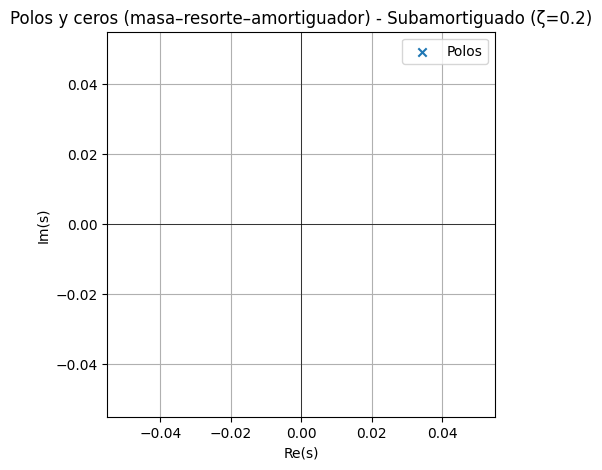

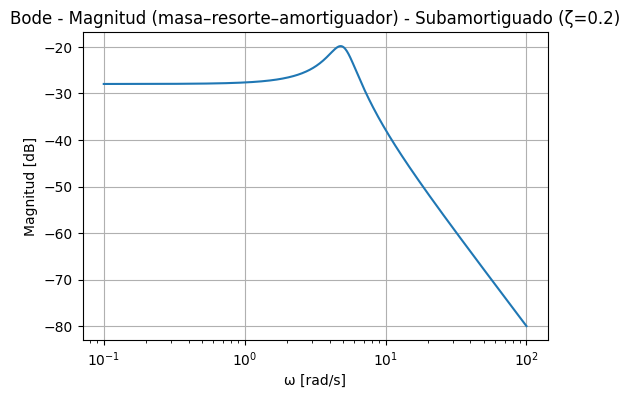

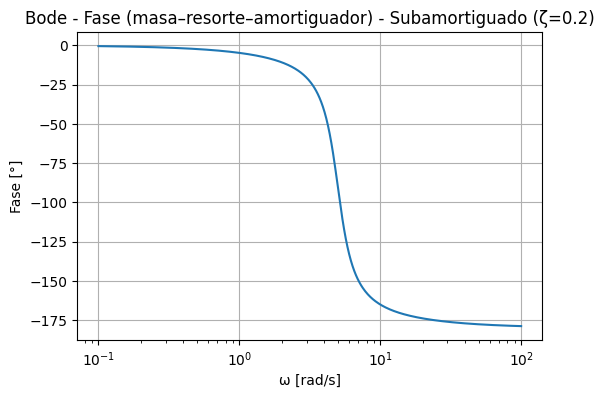

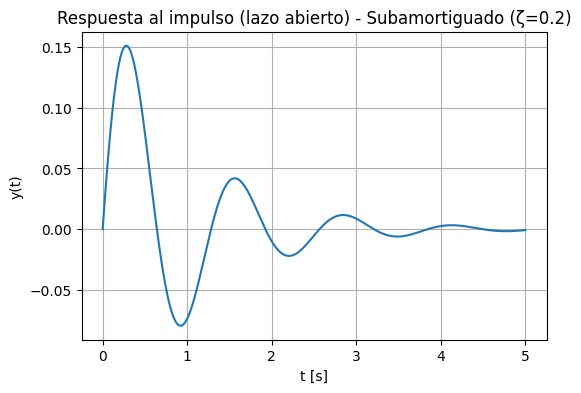

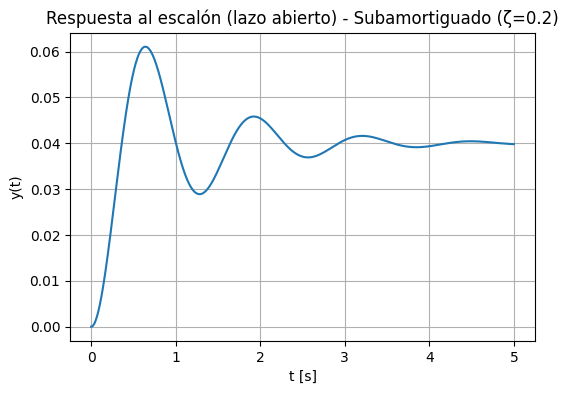

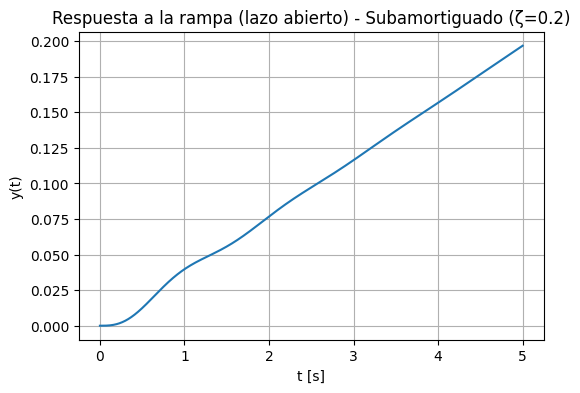

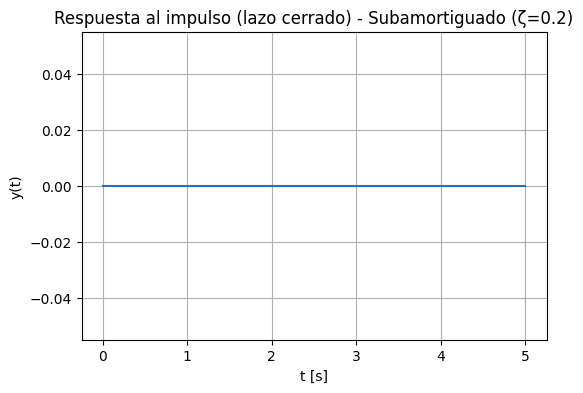

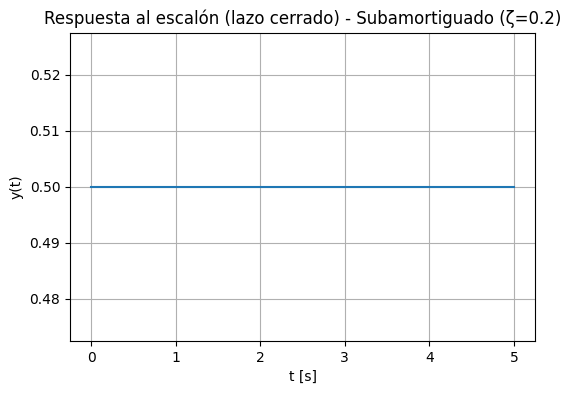

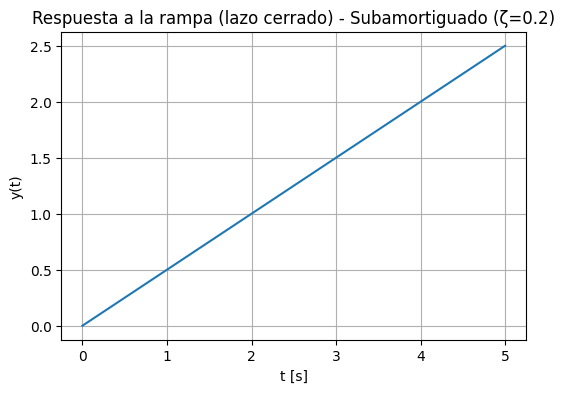

Caso: Críticamente amortiguado (ζ=1)
--------------------------------------------------------------------------------
m = 1.000 kg, k = 25.000 N/m, c = 10.000 N·s/m
ω_n = 5.000 rad/s
ζ   = 1.000
ω_d = nan rad/s
t_p = nan s
t_r = nan s
t_s = 0.800 s


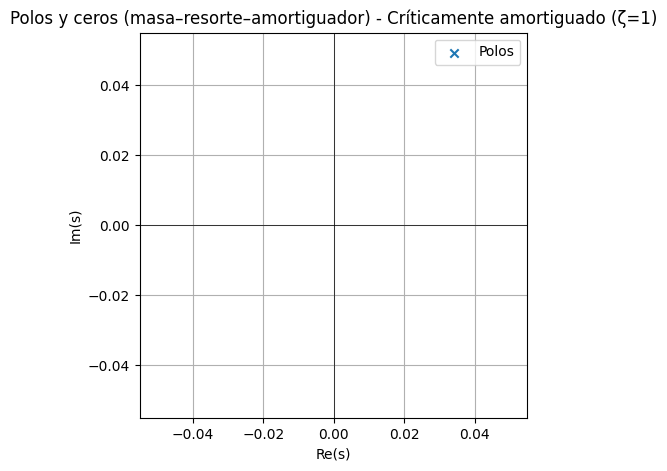

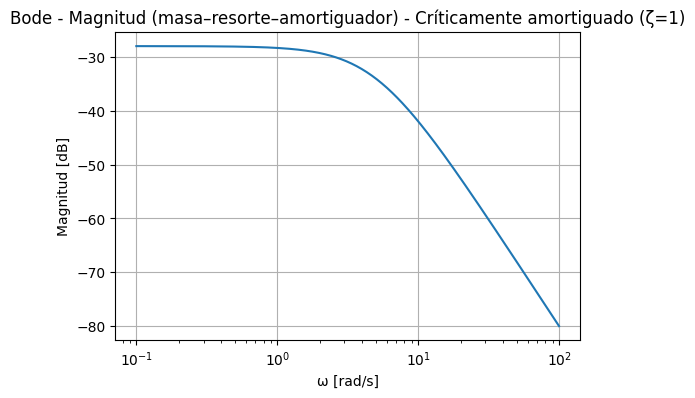

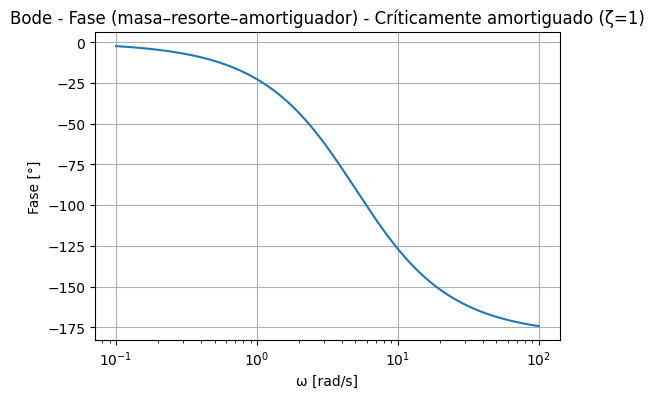

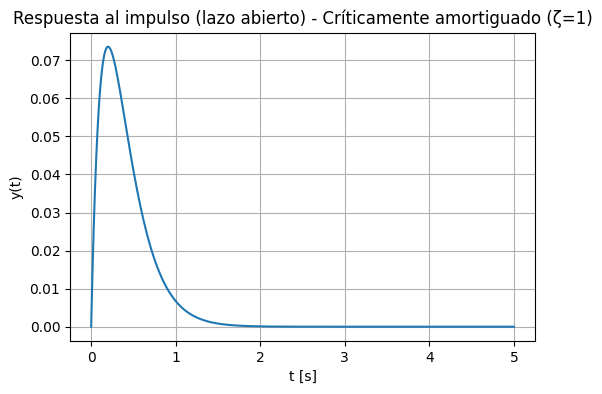

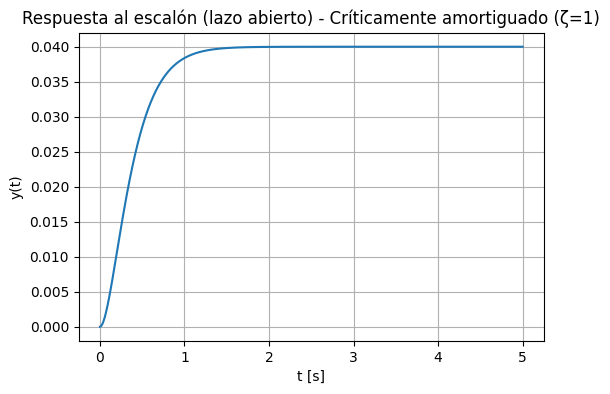

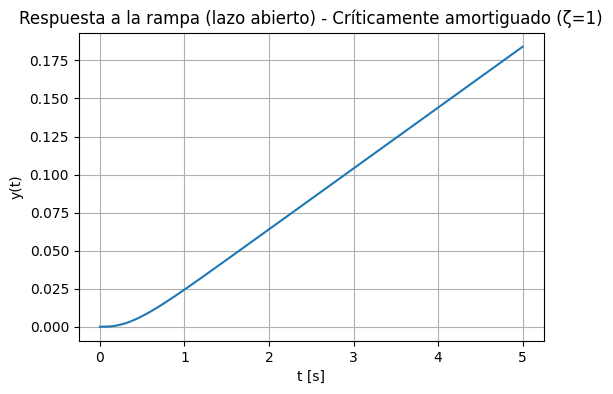

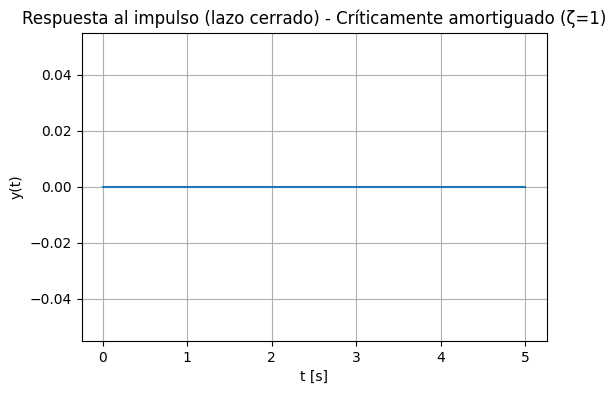

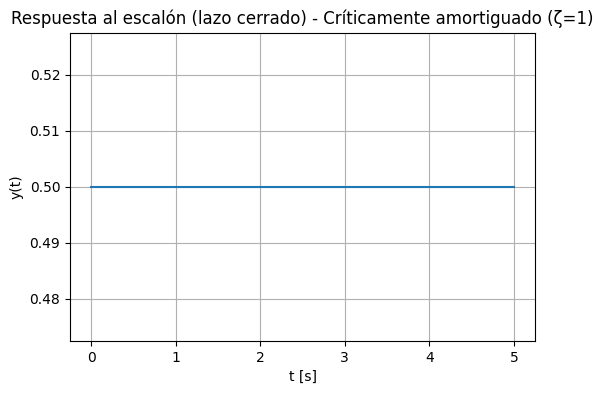

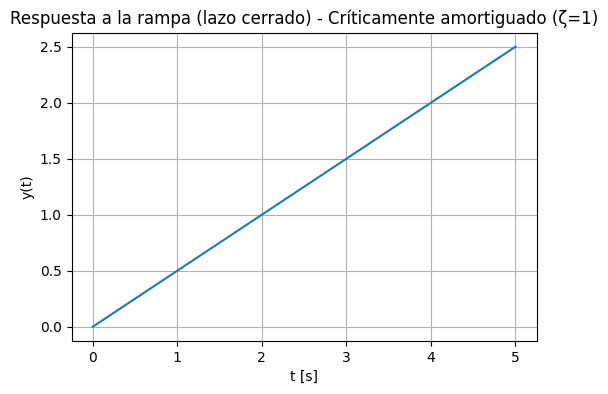

Caso: Sobreamortiguado (ζ=2)
--------------------------------------------------------------------------------
m = 1.000 kg, k = 25.000 N/m, c = 20.000 N·s/m
ω_n = 5.000 rad/s
ζ   = 2.000
ω_d = nan rad/s
t_p = nan s
t_r = nan s
t_s = 0.400 s


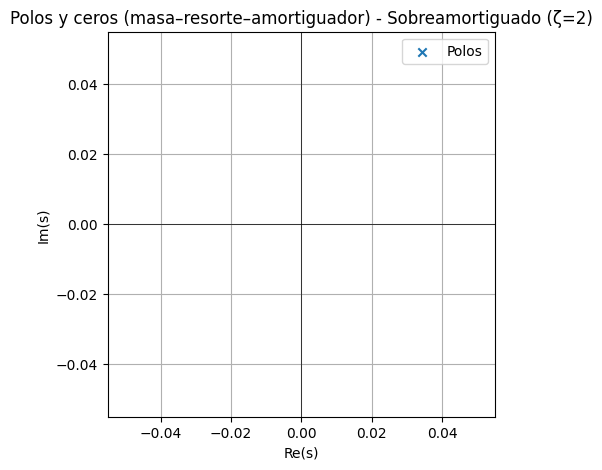

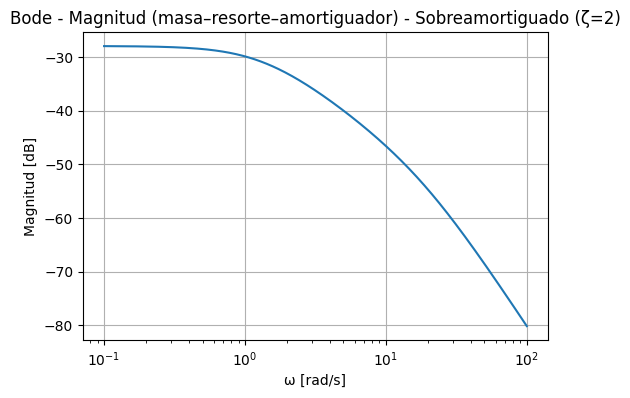

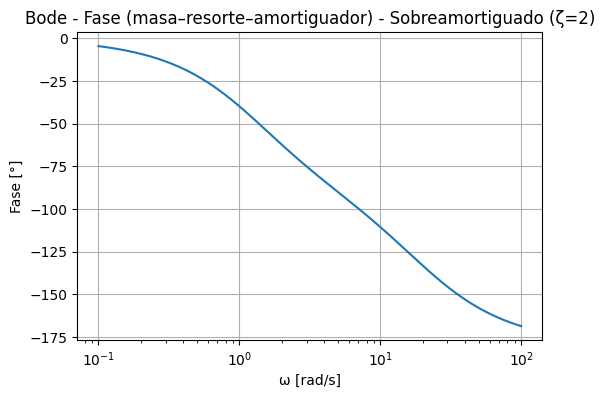

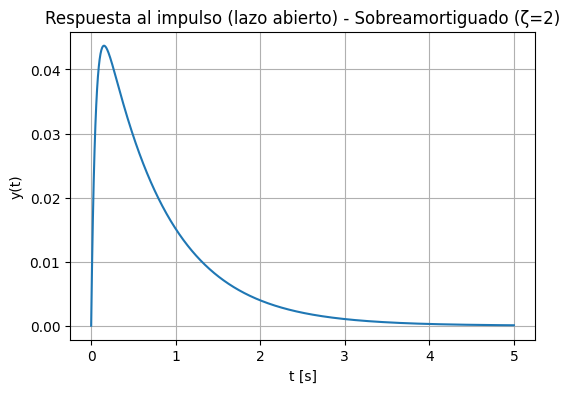

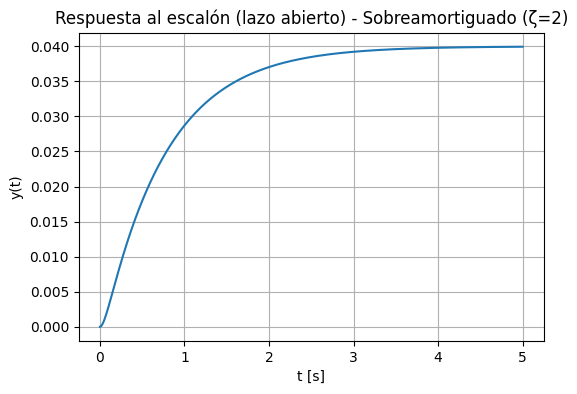

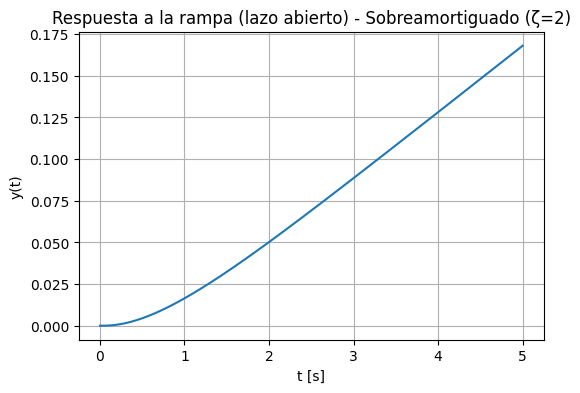

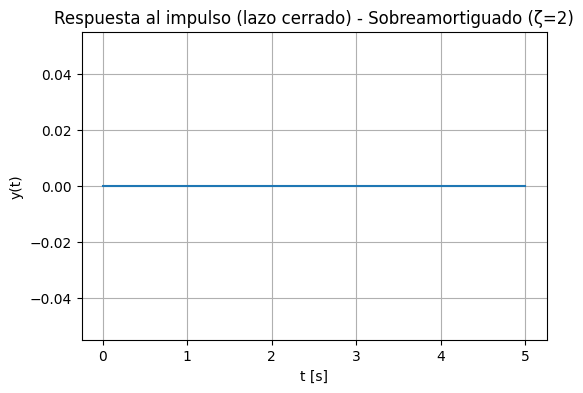

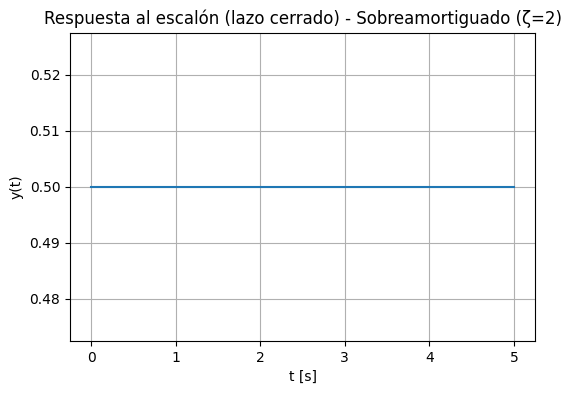

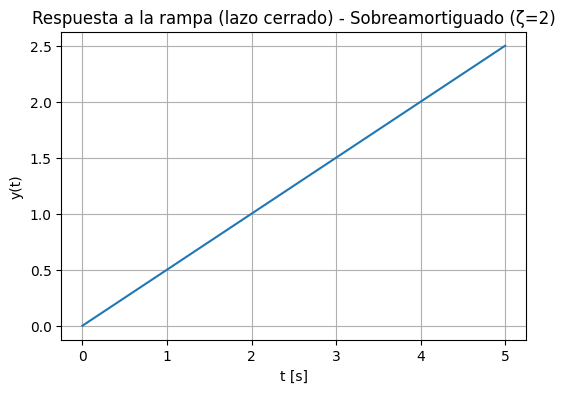

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ---------------------------------------------------------
# 1. Parámetros base del sistema masa–resorte–amortiguador
# ---------------------------------------------------------

m = 1.0   # kg
k = 25.0  # N/m  -> wn = sqrt(k/m) = 5 rad/s

# Tres valores de zeta para los tres tipos de amortiguamiento
zeta_cases = {
    "Subamortiguado (ζ=0.2)": 0.2,
    "Críticamente amortiguado (ζ=1)": 1.0,
    "Sobreamortiguado (ζ=2)": 2.0,
}

# ---------------------------------------------------------
# 2. Funciones auxiliares
# ---------------------------------------------------------

def mechanical_params(m, k, zeta):
    """
    A partir de m, k y zeta:
    - Calcula c (amortiguamiento)
    - Frecuencias wn, wd
    - Tiempos tp, tr, ts (aprox. segundo orden)
    """
    wn = np.sqrt(k / m)               # frecuencia natural no amortiguada
    c  = 2 * zeta * np.sqrt(m * k)    # c = 2 ζ sqrt(mk)

    if zeta < 1:
        wd = wn * np.sqrt(1 - zeta**2)
        tp = np.pi / wd               # tiempo pico
        # Aproximación típica para tiempo de subida en segundo orden
        tr = (1.8 / wn) if 0.45 < zeta < 0.8 else np.nan
    else:
        wd = np.nan
        tp = np.nan
        tr = np.nan

    # Tiempo de establecimiento (2%)
    ts = 4 / (zeta * wn) if zeta > 0 else np.inf

    return {
        "c"  : c,
        "wn" : wn,
        "wd" : wd,
        "tp" : tp,
        "tr" : tr,
        "ts" : ts,
        "zeta": zeta,
    }

def mechanical_tf(m, c, k):
    """
    Función de transferencia mecánica:
        Hm(s) = 1 / (m s^2 + c s + k)
    """
    num = [1.0]
    den = [m, c, k]
    Gm  = signal.TransferFunction(num, den)
    return Gm

def closed_loop_tf(G):
    """
    Lazo cerrado con realimentación unitaria:
        Gcl(s) = G(s) / (1 + G(s))
    Si G(s) = N(s)/D(s), entonces:
        Gcl(s) = N(s) / (D(s) + N(s))
    """
    num = np.array(G.num[0], dtype=float)
    den = np.array(G.den[0], dtype=float)
    den_cl = np.polyadd(den, num)
    Gcl = signal.TransferFunction(num, den_cl)
    return Gcl

def time_responses(G, t_final=5.0, n_points=1000):
    """
    Calcula respuestas:
    - impulso
    - escalón
    - rampa (u(t)=t)
    """
    t = np.linspace(0, t_final, n_points)

    # Impulso
    t_imp, y_imp = signal.impulse(G, T=t)

    # Escalón
    t_step, y_step = signal.step(G, T=t)

    # Rampa: entrada u(t) = t
    u_ramp = t
    t_ramp, y_ramp, _ = signal.lsim(G, U=u_ramp, T=t)

    return (t_imp, y_imp), (t_step, y_step), (t_ramp, y_ramp)

def bode_plot(G, w=None):
    """
    Calcula magnitud y fase de Bode.
    """
    if w is None:
        w = np.logspace(-1, 2, 500)
    w, mag, phase = signal.bode(G, w=w)
    return w, mag, phase

def poles_zeros(G):
    """
    Calcula polos y ceros de G(s).
    """
    num = np.array(G.num[0], dtype=float)
    den = np.array(G.den[0], dtype=float)
    z, p, k = signal.tf2zpk(num, den)
    return z, p, k

# ---------------------------------------------------------
# 3. Bucle principal sobre los tres casos de ζ
# ---------------------------------------------------------

for label, zeta in zeta_cases.items():
    print("="*80)
    print(f"Caso: {label}")
    print("-"*80)

    # Parámetros dinámicos y c que corresponde a ese ζ
    params = mechanical_params(m, k, zeta)
    c   = params["c"]
    wn  = params["wn"]
    wd  = params["wd"]
    tp  = params["tp"]
    tr  = params["tr"]
    ts  = params["ts"]

    print(f"m = {m:.3f} kg, k = {k:.3f} N/m, c = {c:.3f} N·s/m")
    print(f"ω_n = {wn:.3f} rad/s")
    print(f"ζ   = {zeta:.3f}")
    print(f"ω_d = {wd:.3f} rad/s")
    print(f"t_p = {tp:.3f} s")
    print(f"t_r = {tr:.3f} s")
    print(f"t_s = {ts:.3f} s")

    # Función de transferencia mecánica
    Gm = mechanical_tf(m, c, k)

    # Lazo cerrado mecánico
    Gm_cl = closed_loop_tf(Gm)

    # -------------------- Polos y ceros (lazo abierto) --------------------
    z_m, p_m, k_m = poles_zeros(Gm)

    plt.figure(figsize=(5, 5))
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.scatter(p_m.real, p_m.imag, marker='x', label='Polos')
    if len(z_m) > 0:
        plt.scatter(z_m.real, z_m.imag, marker='o', facecolors='none', label='Ceros')
    plt.title(f"Polos y ceros (masa–resorte–amortiguador) - {label}")
    plt.xlabel("Re(s)")
    plt.ylabel("Im(s)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # -------------------- Bode (lazo abierto) --------------------
    w, mag, phase = bode_plot(Gm)

    plt.figure(figsize=(6, 4))
    plt.semilogx(w, mag)
    plt.title(f"Bode - Magnitud (masa–resorte–amortiguador) - {label}")
    plt.xlabel("ω [rad/s]")
    plt.ylabel("Magnitud [dB]")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.semilogx(w, phase)
    plt.title(f"Bode - Fase (masa–resorte–amortiguador) - {label}")
    plt.xlabel("ω [rad/s]")
    plt.ylabel("Fase [°]")
    plt.grid(True)
    plt.show()

    # -------------------- Respuestas en el tiempo (lazo abierto) --------------------
    (t_imp, y_imp), (t_step, y_step), (t_ramp, y_ramp) = time_responses(Gm, t_final=5, n_points=1000)

    plt.figure(figsize=(6, 4))
    plt.plot(t_imp, y_imp)
    plt.title(f"Respuesta al impulso (lazo abierto) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t_step, y_step)
    plt.title(f"Respuesta al escalón (lazo abierto) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t_ramp, y_ramp)
    plt.title(f"Respuesta a la rampa (lazo abierto) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    # -------------------- Respuestas en el tiempo (lazo cerrado) --------------------
    (t_imp_cl, y_imp_cl), (t_step_cl, y_step_cl), (t_ramp_cl, y_ramp_cl) = time_responses(Gm_cl, t_final=5, n_points=1000)

    plt.figure(figsize=(6, 4))
    plt.plot(t_imp_cl, y_imp_cl)
    plt.title(f"Respuesta al impulso (lazo cerrado) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t_step_cl, y_step_cl)
    plt.title(f"Respuesta al escalón (lazo cerrado) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t_ramp_cl, y_ramp_cl)
    plt.title(f"Respuesta a la rampa (lazo cerrado) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()


## 2.x Análisis del sistema eléctrico RLC equivalente

El sistema eléctrico tiene función de transferencia:

$H_e(s) = \frac{V_o(s)}{V_i(s)} = \frac{1}{L C s^2 + \frac{L}{R} s + 1}$

El sistema mecánico es:

$H_m(s) = \frac{1}{m s^2 + c s + k}$

Para obtener un circuito RLC equivalente comparo los denominadores:

- Coeficiente cuadrático:
  $L C = \frac{m}{k}$

- Coeficiente lineal:
  $\frac{L}{R} = \frac{c}{k}$

Usando un valor fijo de $L$ calculo:

- $C = \frac{m}{k L}$
- $R = \frac{L k}{c}$

---

### Casos considerados

Para simular los mismos tres escenarios de amortiguamiento que en el sistema mecánico:

- Subamortiguado: $\zeta = 0.2$
- Crítico: $\zeta = 1$
- Sobreamortiguado: $\zeta = 2$

---

### Para cada caso calculo:

- Valores equivalentes $R$, $L$, $C$
- Función de transferencia eléctrica:

$H_e(s) = \frac{1}{L C s^2 + \frac{L}{R} s + 1}$

---

### Gráficas generadas

Para cada caso trazo:

- Polos y ceros  
- Diagrama de Bode  
- Respuesta impulso  
- Respuesta escalón  
- Respuesta rampa  

---

### Lazo cerrado

También se grafica el comportamiento en lazo cerrado:

$G_{LC}(s) = \frac{G(s)}{1 + G(s)}$


Caso (modelo eléctrico): Subamortiguado (ζ=0.2)
--------------------------------------------------------------------------------
Parámetros eléctricos equivalentes:
L = 1.000 H, R = 12.500 Ω, C = 0.040000 F


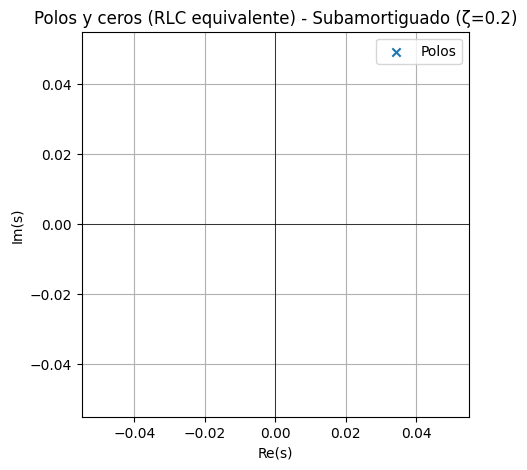

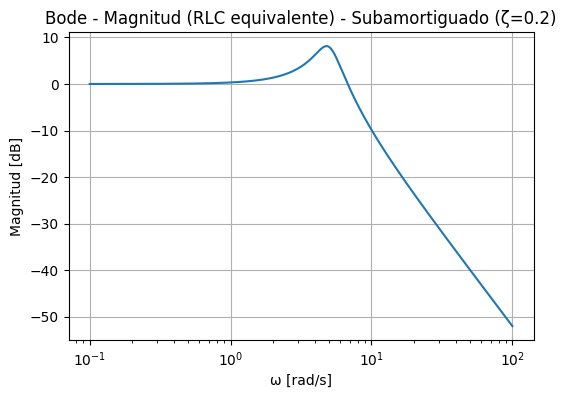

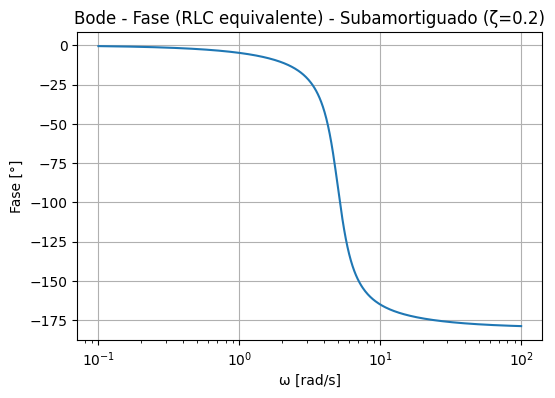

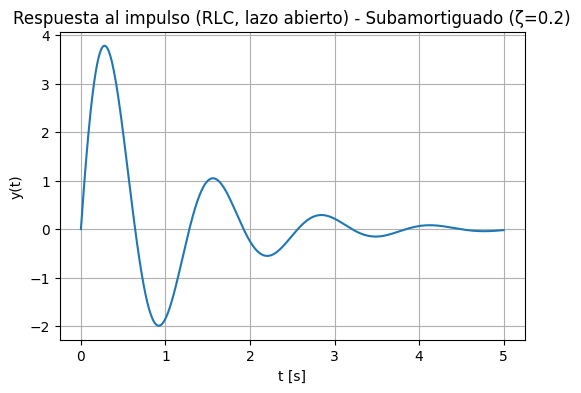

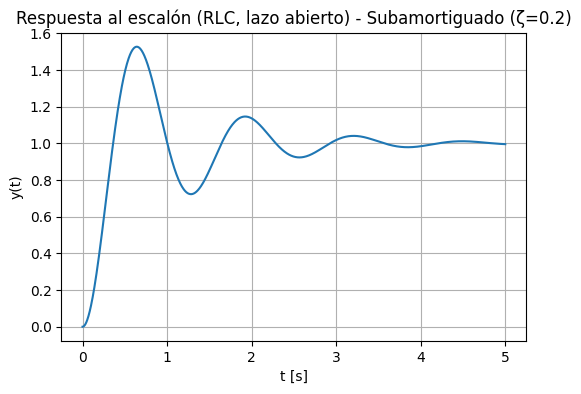

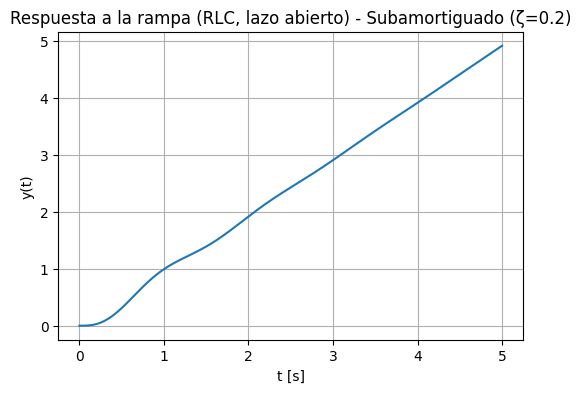

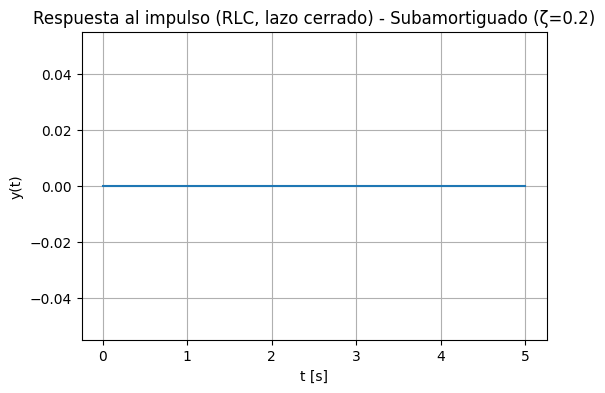

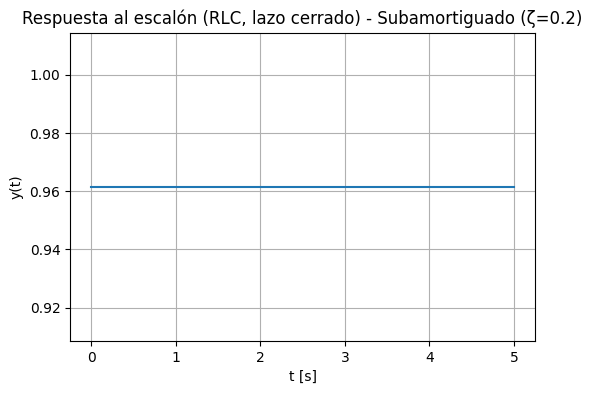

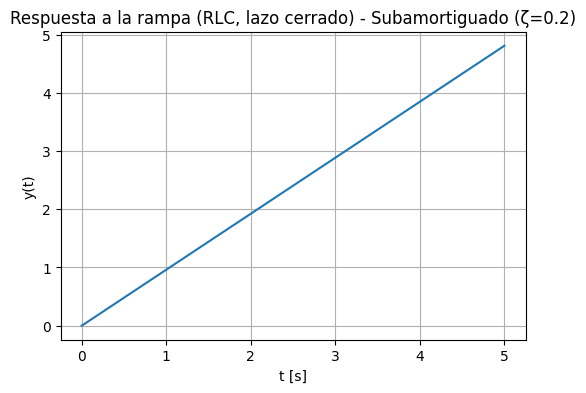

Caso (modelo eléctrico): Críticamente amortiguado (ζ=1)
--------------------------------------------------------------------------------
Parámetros eléctricos equivalentes:
L = 1.000 H, R = 2.500 Ω, C = 0.040000 F


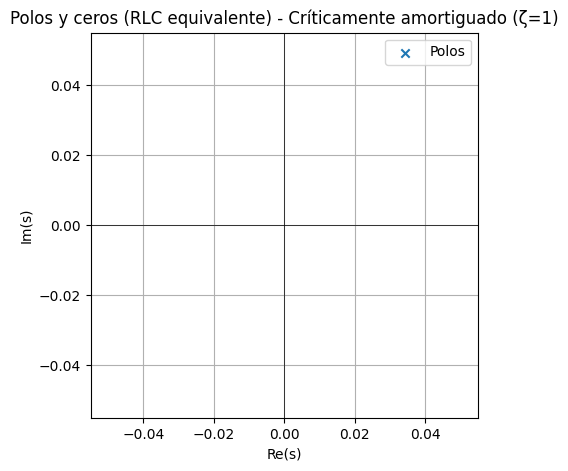

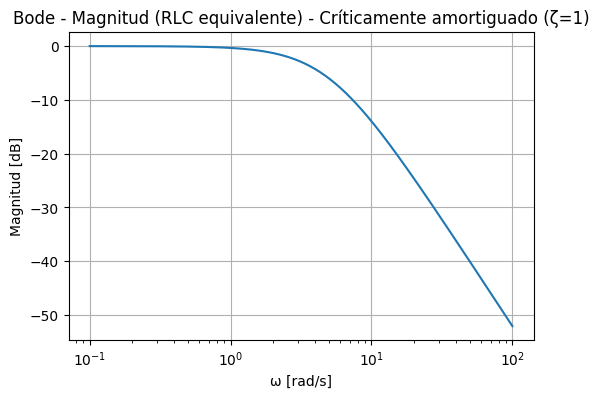

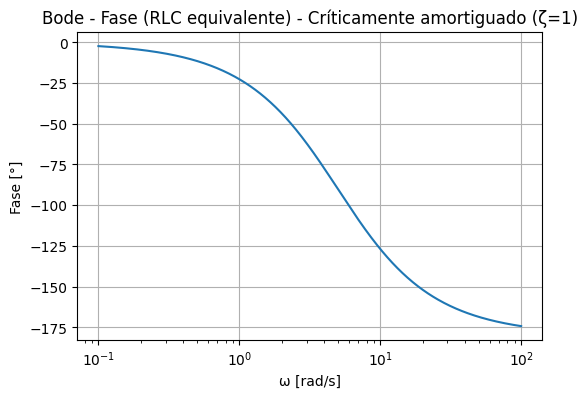

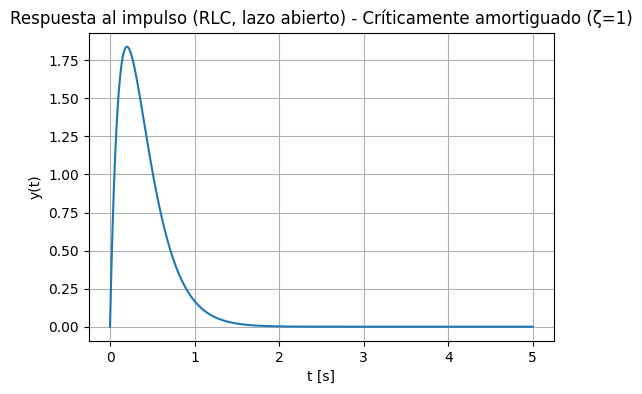

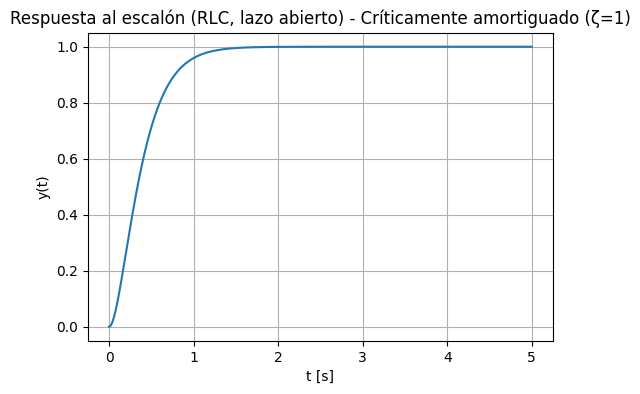

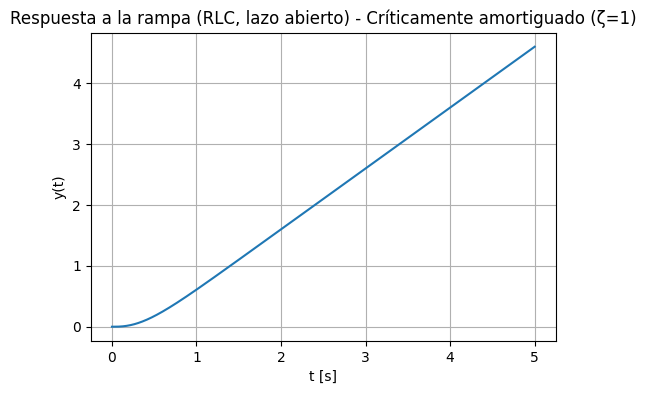

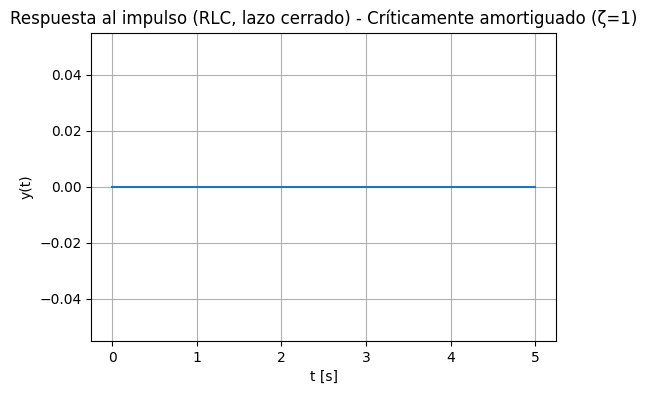

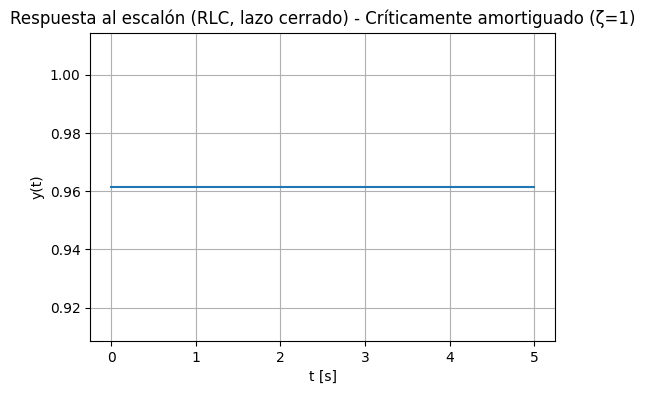

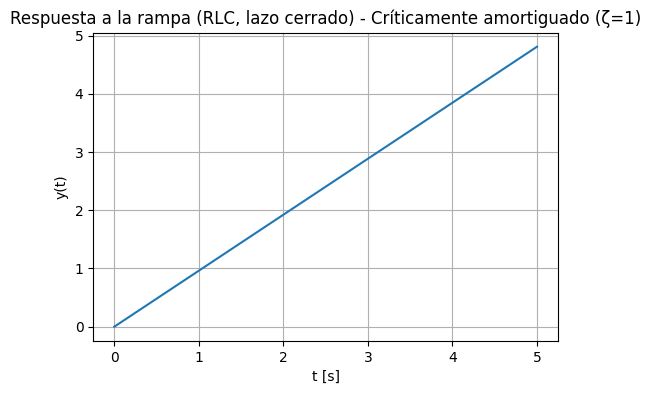

Caso (modelo eléctrico): Sobreamortiguado (ζ=2)
--------------------------------------------------------------------------------
Parámetros eléctricos equivalentes:
L = 1.000 H, R = 1.250 Ω, C = 0.040000 F


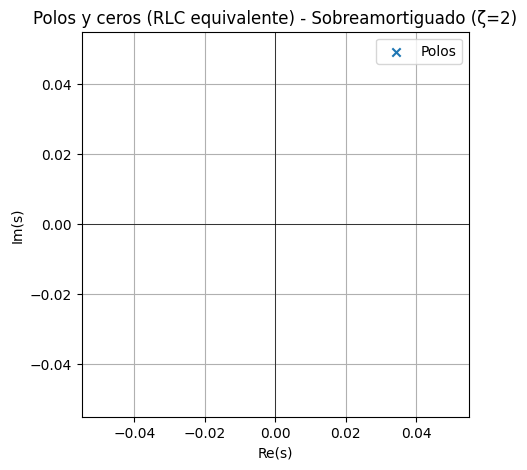

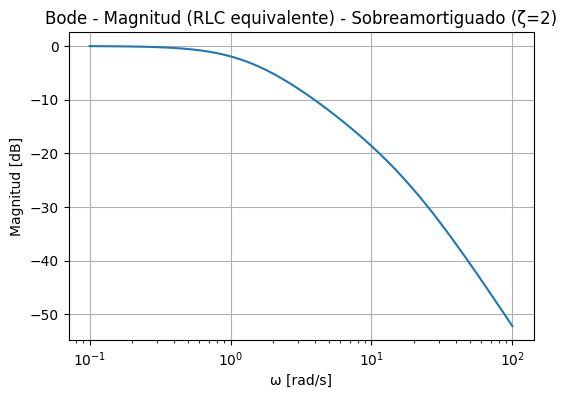

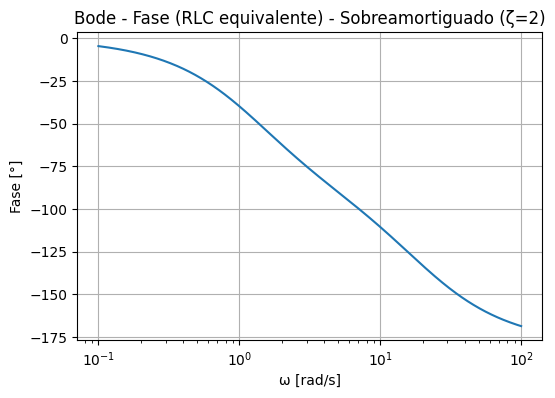

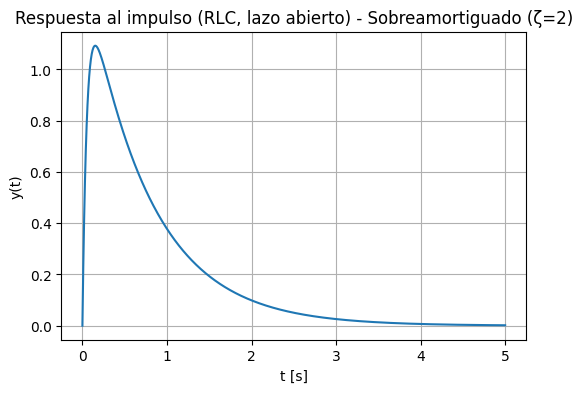

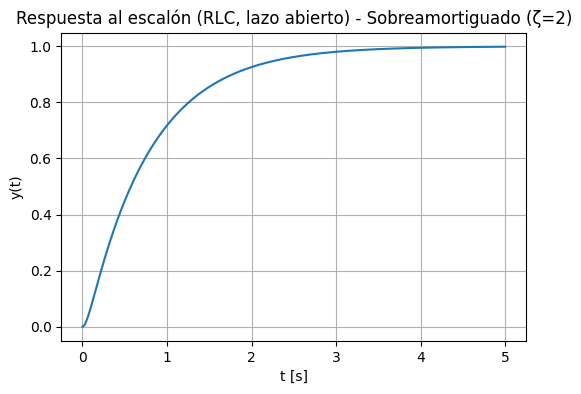

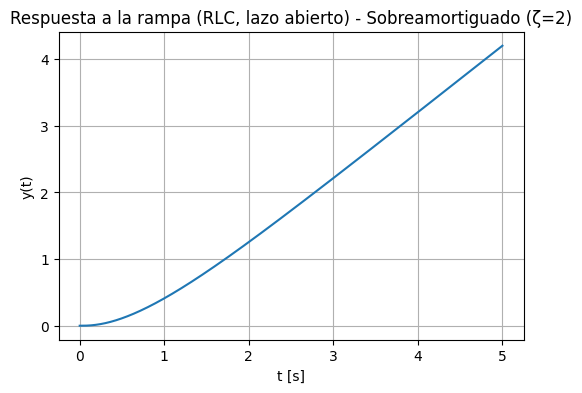

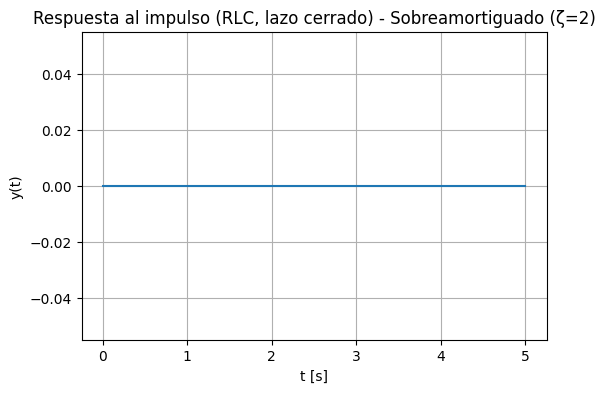

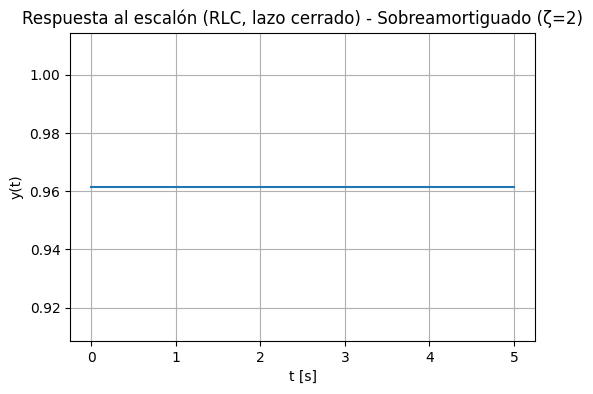

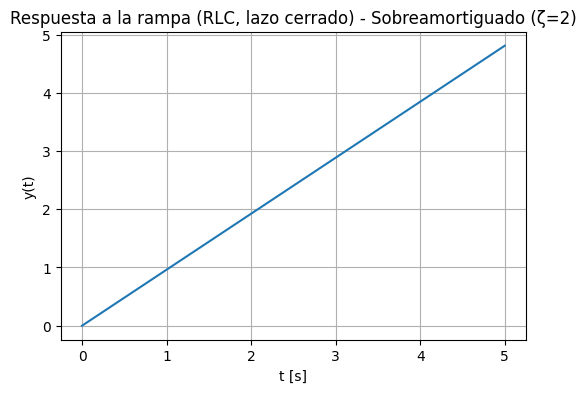

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# ---------------------------------------------------------
# 1. Parámetros base (reutilizo m,k y ζ del modelo mecánico)
# ---------------------------------------------------------

m = 1.0
k = 25.0
zeta_cases = {
    "Subamortiguado (ζ=0.2)": 0.2,
    "Críticamente amortiguado (ζ=1)": 1.0,
    "Sobreamortiguado (ζ=2)": 2.0,
}

# Tomo L como valor de referencia (H)
L_base = 1.0

# ---------------------------------------------------------
# 2. Funciones auxiliares
# ---------------------------------------------------------

def mechanical_c_from_zeta(m, k, zeta):
    """Devuelve c que produce ese zeta para m y k."""
    return 2 * zeta * np.sqrt(m * k)

def electrical_equivalent(m, c, k, L=L_base):
    """
    Calcula R, L, C tales que:
        LC = m/k     --> C = (m/k)/L
        L/R = c/k    --> R = L*k/c
    """
    C = (m / k) / L
    R = L * k / c
    num = [1.0]
    den = [L*C, L/R, 1.0]
    Ge = signal.TransferFunction(num, den)
    return R, L, C, Ge

def closed_loop_tf(G):
    """Lazo cerrado con realimentación unitaria."""
    num = np.array(G.num[0], dtype=float)
    den = np.array(G.den[0], dtype=float)
    den_cl = np.polyadd(den, num)
    return signal.TransferFunction(num, den_cl)

def time_responses(G, t_final=5.0, n_points=1000):
    """Respuestas impulso, escalón y rampa."""
    t = np.linspace(0, t_final, n_points)

    t_imp, y_imp = signal.impulse(G, T=t)
    t_step, y_step = signal.step(G, T=t)

    u_ramp = t
    t_ramp, y_ramp, _ = signal.lsim(G, U=u_ramp, T=t)

    return (t_imp, y_imp), (t_step, y_step), (t_ramp, y_ramp)

def bode_plot(G, w=None):
    """Bode de magnitud y fase."""
    if w is None:
        w = np.logspace(-1, 2, 500)
    w, mag, phase = signal.bode(G, w=w)
    return w, mag, phase

def poles_zeros(G):
    """Polos y ceros de G."""
    num = np.array(G.num[0], dtype=float)
    den = np.array(G.den[0], dtype=float)
    z, p, k = signal.tf2zpk(num, den)
    return z, p, k

# ---------------------------------------------------------
# 3. Bucle principal sobre los tres casos de ζ
# ---------------------------------------------------------

for label, zeta in zeta_cases.items():
    print("="*80)
    print(f"Caso (modelo eléctrico): {label}")
    print("-"*80)

    # c mecánico equivalente para este ζ
    c = mechanical_c_from_zeta(m, k, zeta)

    # Parámetros eléctricos equivalentes
    R, L, C, Ge = electrical_equivalent(m, c, k, L=L_base)

    print(f"Parámetros eléctricos equivalentes:")
    print(f"L = {L:.3f} H, R = {R:.3f} Ω, C = {C:.6f} F")

    # Lazo cerrado eléctrico
    Ge_cl = closed_loop_tf(Ge)

    # -------------------- Polos y ceros (lazo abierto) --------------------
    z_e, p_e, k_e = poles_zeros(Ge)

    plt.figure(figsize=(5, 5))
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.scatter(p_e.real, p_e.imag, marker='x', label='Polos')
    if len(z_e) > 0:
        plt.scatter(z_e.real, z_e.imag, marker='o', facecolors='none', label='Ceros')
    plt.title(f"Polos y ceros (RLC equivalente) - {label}")
    plt.xlabel("Re(s)")
    plt.ylabel("Im(s)")
    plt.grid(True)
    plt.legend()
    plt.show()

    # -------------------- Bode (lazo abierto) --------------------
    w, mag, phase = bode_plot(Ge)

    plt.figure(figsize=(6, 4))
    plt.semilogx(w, mag)
    plt.title(f"Bode - Magnitud (RLC equivalente) - {label}")
    plt.xlabel("ω [rad/s]")
    plt.ylabel("Magnitud [dB]")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.semilogx(w, phase)
    plt.title(f"Bode - Fase (RLC equivalente) - {label}")
    plt.xlabel("ω [rad/s]")
    plt.ylabel("Fase [°]")
    plt.grid(True)
    plt.show()

    # -------------------- Respuestas en el tiempo (lazo abierto) --------------------
    (t_imp, y_imp), (t_step, y_step), (t_ramp, y_ramp) = time_responses(Ge, t_final=5, n_points=1000)

    plt.figure(figsize=(6, 4))
    plt.plot(t_imp, y_imp)
    plt.title(f"Respuesta al impulso (RLC, lazo abierto) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t_step, y_step)
    plt.title(f"Respuesta al escalón (RLC, lazo abierto) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t_ramp, y_ramp)
    plt.title(f"Respuesta a la rampa (RLC, lazo abierto) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    # -------------------- Respuestas en el tiempo (lazo cerrado) --------------------
    (t_imp_cl, y_imp_cl), (t_step_cl, y_step_cl), (t_ramp_cl, y_ramp_cl) = time_responses(Ge_cl, t_final=5, n_points=1000)

    plt.figure(figsize=(6, 4))
    plt.plot(t_imp_cl, y_imp_cl)
    plt.title(f"Respuesta al impulso (RLC, lazo cerrado) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t_step_cl, y_step_cl)
    plt.title(f"Respuesta al escalón (RLC, lazo cerrado) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    plt.plot(t_ramp_cl, y_ramp_cl)
    plt.title(f"Respuesta a la rampa (RLC, lazo cerrado) - {label}")
    plt.xlabel("t [s]")
    plt.ylabel("y(t)")
    plt.grid(True)
    plt.show()


In [ ]:
# ============================================
# 1. INSTALAR DEPENDENCIAS Y PREPARAR ENTORNO
# ============================================
!pip install streamlit soundfile yt-dlp numpy matplotlib scipy -q
!apt-get install ffmpeg -y -qq

# Instalar Cloudflare Tunnel
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64 -q
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

# Crear estructura de MultiApp
!rm -rf pages
!mkdir pages


In [ ]:
%%writefile app.py
import streamlit as st

st.set_page_config(page_title="Parcial 2 – Señales y Sistemas")
st.title("Dashboard Parcial 2 – Señales y Sistemas")

st.write("Usa el menú lateral (☰ arriba a la izquierda) para navegar por los ejercicios.")
st.write("Actualmente hay dos módulos:")
st.markdown("- **1. Modulación AM con audio de YouTube**")
st.markdown("- **2. Sistema masa–resorte–amortiguador y circuito RLC equivalente**")


Overwriting app.py


In [ ]:
%%writefile pages/1_Modulacion_AM.py
import streamlit as st
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
import subprocess, os, shlex

st.title("1. Modulación y Demodulación AM – Parcial")

st.write("""
Este módulo descarga 5 segundos de una canción de YouTube, la modula en AM DSB-CS
y aplica demodulación coherente usando filtro pasa bajas en la FFT.
""")

# -----------------------------
# Entrada de YouTube
# -----------------------------
default = "https://www.youtube.com/watch?v=ExCIp6TOnJw"
url = st.text_input("Link de YouTube:", value=default)

if st.button("Procesar"):
    st.info("Descargando y procesando audio…")

    # Limpiar archivos previos
    for f in ["audio.mp3", "audio.m4a", "audio.webm", "output.wav"]:
        if os.path.exists(f):
            os.remove(f)

    # Descargar audio con yt-dlp
    cmd = f'yt-dlp --extract-audio --audio-format mp3 -o "audio.%(ext)s" "{url}"'
    subprocess.run(shlex.split(cmd), stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Convertir a WAV con ffmpeg
    subprocess.run("ffmpeg -y -i audio.mp3 output.wav".split(),
                   stdout=subprocess.PIPE, stderr=subprocess.PIPE)

    # Leer audio
    audio, fs = sf.read("output.wav")

    # Si es estéreo, tomar un canal
    if audio.ndim > 1:
        audio = audio[:, 0]

    # Tomar 5 s desde t = 20 s
    ini = int(20 * fs)
    fin = ini + int(5 * fs)
    m = audio[ini:fin]
    m = m / np.max(np.abs(m))  # normalizar

    t = np.arange(len(m)) / fs

    st.subheader("Fragmento de audio (mensaje m(t))")
    st.audio(m, sample_rate=fs)

    # -----------------------------
    # Modulación AM DSB-CS
    # -----------------------------
    fc = 5000  # Hz
    c = np.cos(2 * np.pi * fc * t)
    y = (1 + m) * c
    y = y / np.max(np.abs(y))

    st.subheader("Señal modulada en AM")
    st.audio(y, sample_rate=fs)

    # -----------------------------
    # Demodulación coherente
    # -----------------------------
    u = y * c                      # Mezclador
    U = np.fft.rfft(u)
    f = np.fft.rfftfreq(len(u), 1/fs)

    # Filtro pasa bajas ideal en frecuencia
    H = np.zeros_like(U)
    H[f <= 8000] = 1  # ancho de banda

    Yf = U * H
    rec = np.fft.irfft(Yf)
    rec = rec / np.max(np.abs(rec))

    st.subheader("Señal demodulada (recuperada)")
    st.audio(rec, sample_rate=fs)

    # -----------------------------
    # Comparación gráfica
    # -----------------------------
    fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    ax[0].plot(t, m)
    ax[0].set_title("Mensaje original m(t)")
    ax[0].set_ylabel("Amplitud")
    ax[0].grid(True)

    ax[1].plot(t, rec)
    ax[1].set_title("Mensaje recuperado después de demodulación")
    ax[1].set_xlabel("Tiempo [s]")
    ax[1].set_ylabel("Amplitud")
    ax[1].grid(True)

    st.pyplot(fig)

    st.success("Demodulación completada correctamente.")


Writing pages/1_Modulacion_AM.py


In [ ]:
%%writefile pages/2_Sistema_MasaResorte_RLC.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

st.title("2. Sistema masa–resorte–amortiguador y circuito RLC equivalente")

st.markdown(r"""
En este módulo analizo el sistema mecánico

$$
m \frac{d^2 y(t)}{dt^2} + c \frac{d y(t)}{dt} + k\,y(t) = F_E(t)
$$

con función de transferencia:

$$
H_m(s) = \frac{Y(s)}{F_E(s)} = \frac{1}{m s^2 + c s + k}.
$$

A partir de este modelo, construyo un circuito RLC equivalente con:

$$
H_e(s) = \frac{V_o(s)}{V_i(s)} = \frac{1}{L C s^2 + \frac{L}{R} s + 1}
$$

igualando coeficientes:

$$
L C = \frac{m}{k}, \qquad \frac{L}{R} = \frac{c}{k}.
$$

Con esto obtengo $R$, $L$ y $C$ y comparo el comportamiento dinámico
(masa–resorte vs. RLC) en lazo abierto y lazo cerrado.
""")

# ============================================================
# Sidebar: parámetros
# ============================================================

st.sidebar.header("Parámetros del sistema mecánico")

m = st.sidebar.number_input("Masa m [kg]", min_value=0.01, max_value=50.0, value=1.0)
k = st.sidebar.number_input("Constante k [N/m]", min_value=0.01, max_value=500.0, value=25.0)
c = st.sidebar.number_input("Coeficiente de amortiguamiento c [N·s/m]", min_value=0.0, max_value=100.0, value=5.0)

st.sidebar.markdown("---")
st.sidebar.header("Parámetros del circuito RLC")

R = st.sidebar.number_input("Resistencia R [Ω]", min_value=0.01, max_value=500.0, value=5.0)
L = st.sidebar.number_input("Inductancia L [H]", min_value=0.000001, max_value=10.0, value=1.0)
C = st.sidebar.number_input("Capacitancia C [F]", min_value=0.0000001, max_value=10.0, value=0.01)

modo = st.sidebar.radio("Modo de operación", ("Lazo abierto", "Lazo cerrado"))
t_final = st.sidebar.slider("Tiempo máximo de simulación [s]", 1.0, 20.0, 5.0, 0.5)

# Botón para copiar equivalencia mecánico → eléctrico
if st.sidebar.button("Ajustar R, L, C según el sistema mecánico"):
    # Fórmulas equivalentes:
    # L*C = m/k  → C = (m/k)/L  (dejamos L igual)
    # L/R = c/k → R = L*k/c
    C = (m / k) / L
    R = (L * k / c) if c > 0 else 99999

    st.sidebar.success(f"Nuevos valores asignados:\nR = {R:.3f} Ω\nC = {C:.6f} F")


# ============================================================
# Funciones auxiliares
# ============================================================

def mechanical_params(m, k, c):
    """Cálculo de ωn, ζ, ωd, tiempos típicos y clasificación."""
    wn = np.sqrt(k / m)
    zeta = c / (2 * np.sqrt(m * k)) if m > 0 and k > 0 else 0.0

    if zeta < 1:
        wd = wn * np.sqrt(1 - zeta**2)
        tp = np.pi / wd
        tr = (1.8 / wn) if 0.45 < zeta < 0.8 else np.nan
    else:
        wd = np.nan
        tp = np.nan
        tr = np.nan

    ts = 4 / (zeta * wn) if zeta > 0 else np.inf

    if zeta < 1:
        tipo = "Subamortiguado"
    elif np.isclose(zeta, 1.0, atol=0.05):
        tipo = "Críticamente amortiguado"
    else:
        tipo = "Sobreamortiguado"

    return wn, zeta, wd, tp, tr, ts, tipo


def mechanical_tf(m, c, k):
    """Hm(s) = 1 / (m s^2 + c s + k)."""
    num = [1.0]
    den = [m, c, k]
    return signal.TransferFunction(num, den)


def electrical_equivalent(m, c, k, L):
    """
    Construye el modelo RLC equivalente:

        L C = m/k   ->  C = (m/k)/L
        L/R = c/k   ->  R = L*k/c
    """
    if c <= 0:
        return None, None, None, None

    C = (m / k) / L
    R = L * k / c
    num = [1.0]
    den = [L * C, L / R, 1.0]
    Ge = signal.TransferFunction(num, den)
    return R, L, C, Ge


def closed_loop_tf(G):
    """Lazo cerrado con realimentación unitaria: Gcl(s) = G(s)/(1+G(s))."""
    num = np.squeeze(G.num)
    den = np.squeeze(G.den)
    den_cl = np.polyadd(den, num)
    return signal.TransferFunction(num, den_cl)


def time_responses(G, t_final, n_points=1000):
    """Respuestas impulso, escalón y rampa para la función de transferencia G."""
    t = np.linspace(0, t_final, n_points)

    t_imp, y_imp = signal.impulse(G, T=t)
    t_step, y_step = signal.step(G, T=t)

    u_ramp = t
    t_ramp, y_ramp, _ = signal.lsim(G, U=u_ramp, T=t)

    return (t_imp, y_imp), (t_step, y_step), (t_ramp, y_ramp)


def bode_data(G):
    """Datos para diagrama de Bode."""
    w = np.logspace(-1, 2, 500)
    w, mag, phase = signal.bode(G, w=w)
    return w, mag, phase


def poles_zeros(G):
    """Polos y ceros de G(s)."""
    num = np.squeeze(G.num)
    den = np.squeeze(G.den)
    z, p, _ = signal.tf2zpk(num, den)
    return z, p

# ============================================================
# Cálculos del sistema mecánico y eléctrico
# ============================================================

wn, zeta, wd, tp, tr, ts, tipo = mechanical_params(m, k, c)
Gm = mechanical_tf(m, c, k)

R, L_eq, C_eq, Ge = electrical_equivalent(m, c, k, L=L)

if modo == "Lazo cerrado":
    Gm = closed_loop_tf(Gm)
    if Ge is not None:
        Ge = closed_loop_tf(Ge)

# ============================================================
# Mostrar parámetros numéricos
# ============================================================

st.subheader("Parámetros dinámicos del sistema mecánico")

st.markdown(
    rf"""
- Frecuencia natural no amortiguada: $ \omega_n = {wn:.3f}\ \text{{rad/s}} $
- Factor de amortiguamiento: $ \zeta = {zeta:.3f} $
- Tipo de respuesta: **{tipo}**
- Frecuencia amortiguada: $ \omega_d = {wd:.3f}\ \text{{rad/s}} $ ({'N/A' if np.isnan(wd) else ''})
- Tiempo pico aproximado: $ t_p = {tp:.3f}\ \text{{s}} $
- Tiempo de levantamiento (aprox.): $ t_r = {tr:.3f}\ \text{{s}} $
- Tiempo de establecimiento (2\%): $ t_s = {ts:.3f}\ \text{{s}} $
"""
)

st.markdown("---")
st.subheader("Parámetros del circuito RLC equivalente")

if Ge is None:
    st.warning("Para c = 0 no se puede definir un equivalente RLC con amortiguamiento (R → ∞).")
else:
    st.markdown(
        rf"""
- Resistencia equivalente: $ R = {R:.3f}\ \Omega $
- Inductancia: $ L = {L_eq:.3f}\ \text{{H}} $
- Capacitancia: $ C = {C_eq:.6e}\ \text{{F}} $
"""
    )

# ============================================================
# Tabs: modelo mecánico / modelo eléctrico
# ============================================================

tab_mec, tab_ele = st.tabs(["Modelo mecánico", "Modelo eléctrico equivalente"])

# --------------------- MODELO MECÁNICO ----------------------
with tab_mec:
    st.markdown("### Función de transferencia mecánica")

    t_resp_m = time_responses(Gm, t_final=t_final)
    bode_w_m, bode_mag_m, bode_phase_m = bode_data(Gm)
    z_m, p_m = poles_zeros(Gm)

    # Todas las gráficas una debajo de otra

    # Polos y ceros
    st.markdown("#### Polos y ceros")
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.axhline(0, color="black", linewidth=0.5)
    ax.axvline(0, color="black", linewidth=0.5)
    ax.scatter(p_m.real, p_m.imag, marker="x", label="Polos")
    if len(z_m) > 0:
        ax.scatter(z_m.real, z_m.imag, marker="o", facecolors="none", label="Ceros")
    ax.set_title("Plano s (mecánico)")
    ax.set_xlabel("Re(s)")
    ax.set_ylabel("Im(s)")
    ax.grid(True)
    ax.legend()
    st.pyplot(fig)

    # Bode magnitud
    st.markdown("#### Diagrama de Bode – Magnitud")
    fig1, ax1 = plt.subplots(figsize=(6, 3))
    ax1.semilogx(bode_w_m, bode_mag_m)
    ax1.set_title("Bode - Magnitud (mecánico)")
    ax1.set_xlabel("ω [rad/s]")
    ax1.set_ylabel("Magnitud [dB]")
    ax1.grid(True)
    st.pyplot(fig1)

    # Bode fase
    st.markdown("#### Diagrama de Bode – Fase")
    fig2, ax2 = plt.subplots(figsize=(6, 3))
    ax2.semilogx(bode_w_m, bode_phase_m)
    ax2.set_title("Bode - Fase (mecánico)")
    ax2.set_xlabel("ω [rad/s]")
    ax2.set_ylabel("Fase [°]")
    ax2.grid(True)
    st.pyplot(fig2)

    # Respuestas en el tiempo
    (t_imp_m, y_imp_m), (t_step_m, y_step_m), (t_ramp_m, y_ramp_m) = t_resp_m

    # Impulso
    st.markdown("#### Respuesta al impulso")
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(t_imp_m, y_imp_m)
    ax.set_xlabel("t [s]")
    ax.set_ylabel("y(t)")
    ax.set_title("Impulso (mecánico)")
    ax.grid(True)
    st.pyplot(fig)

    # Escalón con marcas de tp, tr, ts
    st.markdown("#### Respuesta al escalón (con tiempos característicos)")
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(t_step_m, y_step_m, label="Respuesta al escalón")
    # Marcar tiempos si existen
    if not np.isnan(tp) and tp > 0 and tp <= t_final:
        ax.axvline(tp, color="red", linestyle="--", label=f"$t_p$ ≈ {tp:.2f} s")
    if not np.isnan(tr) and tr > 0 and tr <= t_final:
        ax.axvline(tr, color="green", linestyle="--", label=f"$t_r$ ≈ {tr:.2f} s")
    if np.isfinite(ts) and ts > 0 and ts <= t_final:
        ax.axvline(ts, color="purple", linestyle="--", label=f"$t_s$ ≈ {ts:.2f} s")
    ax.set_xlabel("t [s]")
    ax.set_ylabel("y(t)")
    ax.set_title("Escalón (mecánico)")
    ax.grid(True)
    ax.legend()
    st.pyplot(fig)

    # Rampa
    st.markdown("#### Respuesta a la rampa")
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(t_ramp_m, y_ramp_m)
    ax.set_xlabel("t [s]")
    ax.set_ylabel("y(t)")
    ax.set_title("Rampa (mecánico)")
    ax.grid(True)
    st.pyplot(fig)

# --------------------- MODELO ELÉCTRICO ----------------------
with tab_ele:
    st.markdown("### Función de transferencia eléctrica RLC")

    if Ge is None:
        st.info("No hay modelo eléctrico definido para estos parámetros.")
    else:
        t_resp_e = time_responses(Ge, t_final=t_final)
        bode_w_e, bode_mag_e, bode_phase_e = bode_data(Ge)
        z_e, p_e = poles_zeros(Ge)

        # Todas las gráficas una debajo de otra

        # Polos y ceros
        st.markdown("#### Polos y ceros")
        fig, ax = plt.subplots(figsize=(5, 4))
        ax.axhline(0, color="black", linewidth=0.5)
        ax.axvline(0, color="black", linewidth=0.5)
        ax.scatter(p_e.real, p_e.imag, marker="x", label="Polos")
        if len(z_e) > 0:
            ax.scatter(z_e.real, z_e.imag, marker="o", facecolors="none", label="Ceros")
        ax.set_title("Plano s (RLC)")
        ax.set_xlabel("Re(s)")
        ax.set_ylabel("Im(s)")
        ax.grid(True)
        ax.legend()
        st.pyplot(fig)

        # Bode magnitud
        st.markdown("#### Diagrama de Bode – Magnitud")
        fig1, ax1 = plt.subplots(figsize=(6, 3))
        ax1.semilogx(bode_w_e, bode_mag_e)
        ax1.set_title("Bode - Magnitud (RLC)")
        ax1.set_xlabel("ω [rad/s]")
        ax1.set_ylabel("Magnitud [dB]")
        ax1.grid(True)
        st.pyplot(fig1)

        # Bode fase
        st.markdown("#### Diagrama de Bode – Fase")
        fig2, ax2 = plt.subplots(figsize=(6, 3))
        ax2.semilogx(bode_w_e, bode_phase_e)
        ax2.set_title("Bode - Fase (RLC)")
        ax2.set_xlabel("ω [rad/s]")
        ax2.set_ylabel("Fase [°]")
        ax2.grid(True)
        st.pyplot(fig2)

        # Respuestas en el tiempo
        (t_imp_e, y_imp_e), (t_step_e, y_step_e), (t_ramp_e, y_ramp_e) = t_resp_e

        # Impulso
        st.markdown("#### Respuesta al impulso")
        fig, ax = plt.subplots(figsize=(6, 3))
        ax.plot(t_imp_e, y_imp_e)
        ax.set_xlabel("t [s]")
        ax.set_ylabel("y(t)")
        ax.set_title("Impulso (RLC)")
        ax.grid(True)
        st.pyplot(fig)

        # Escalón (para el eléctrico no recalculo tp,tr,ts, pero se puede interpretar igual)
        st.markdown("#### Respuesta al escalón")
        fig, ax = plt.subplots(figsize=(6, 3))
        ax.plot(t_step_e, y_step_e)
        ax.set_xlabel("t [s]")
        ax.set_ylabel("y(t)")
        ax.set_title("Escalón (RLC)")
        ax.grid(True)
        st.pyplot(fig)

        # Rampa
        st.markdown("#### Respuesta a la rampa")
        fig, ax = plt.subplots(figsize=(6, 3))
        ax.plot(t_ramp_e, y_ramp_e)
        ax.set_xlabel("t [s]")
        ax.set_ylabel("y(t)")
        ax.set_title("Rampa (RLC)")
        ax.grid(True)
        st.pyplot(fig)


Writing pages/2_Sistema_MasaResorte_RLC.py


In [ ]:
# ============================================
# EJECUTAR STREAMLIT Y CREAR EL TÚNEL
# ============================================

# Ejecutar Streamlit en segundo plano
!streamlit run app.py &>/content/logs.txt &

# Iniciar túnel de Cloudflare
!cloudflared tunnel --url http://localhost:8501 > /content/tunnel.log 2>&1 &

import time, re

print("⏳ Esperando a que Cloudflare genere la URL...\n")
time.sleep(8)

url = None
with open("/content/tunnel.log") as f:
    lines = f.readlines()
    for line in lines:
        match = re.search(r"https://[-a-zA-Z0-9@:%._+~#=]{1,256}\.trycloudflare\.com", line)
        if match:
            url = match.group(0)
            break

if url:
    print("✨ TU DASHBOARD ESTÁ LISTO:")
    print(url)
else:
    print("⚠ No se encontró la URL aún.")
    print("Revisa el log manualmente con:\n")
    print("!sed -n '1,200p' /content/tunnel.log")


⏳ Esperando a que Cloudflare genere la URL...

✨ TU DASHBOARD ESTÁ LISTO:
https://cover-gene-entered-significance.trycloudflare.com
